In [1]:
# 데이터 분석
import pandas as pd
import numpy as np
import random as rnd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt ##그래프를 그려주는 간단한 시각화 패키지
%matplotlib inline
## 데이터 로딩 및 확인

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

## 데이터 로딩 및 확인

In [2]:
# 데이터 로딩
df = pd.read_csv('./data/Starbucks satisfactory survey.csv')
df_columns = pd.read_csv('./data/Starbucks satisfactory survey columns.csv')

In [3]:
df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [4]:
#데이터 열이름 변경
df.columns = df_columns.columns

In [5]:
#Id 변경
df["Id"]=df["Id"].index+1
df.head()

,Id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,spendPurchase,productRate,priceRate,promoRate,ambianceRate,wifiRate,serviceRate,chooseRate,promoMethod,loyal
0,1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,3,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,4,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,5,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [6]:
df.describe()

,Id,productRate,priceRate,promoRate,ambianceRate,wifiRate,serviceRate,chooseRate
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,61.500000,3.663934,2.893443,3.795082,3.754098,3.254098,3.745902,3.516393
std,35.362409,0.941343,1.081836,1.090443,0.929867,0.958317,0.828834,1.030394
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,31.250000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,61.500000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,91.750000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,122.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Missing Value 처리

In [7]:
# check missing values in train dataset
df.isnull().sum()

Id                0
gender            0
age               0
status            0
income            0
visitNo           0
method            1
timeSpend         0
location          0
membershipCard    0
itemPurchase      0
spendPurchase     0
productRate       0
priceRate         0
promoRate         0
ambianceRate      0
wifiRate          0
serviceRate       0
chooseRate        0
promoMethod       1
loyal             0
dtype: int64

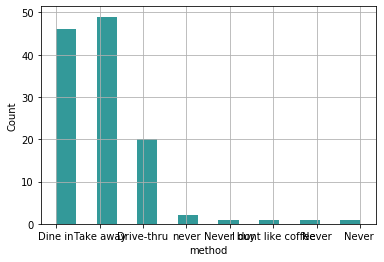

In [8]:
# method가 어떻게 분포되어 있는지 히스토그램으로 확인
ax = df["method"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='method', ylabel='Count')
plt.show()

In [9]:
df['method'].mode()

0    Take away
dtype: object

method는 Take away가 가장 많아 누락값에 Take away를 채워넣는다.

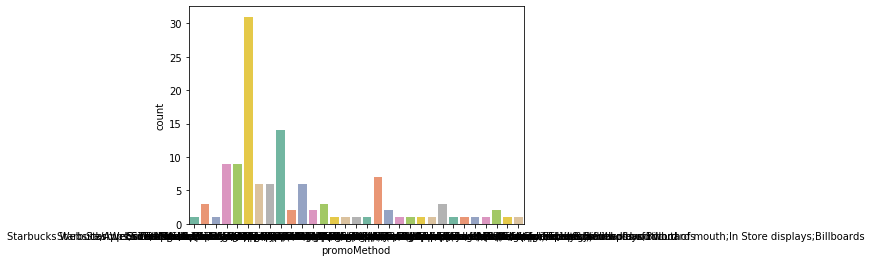

In [10]:
# train set에서 Embarked 의 분포를 확인해보자.
sns.countplot(x='promoMethod',data=df,palette='Set2')
plt.show()

In [11]:
df['promoMethod'].mode()

0    Social Media
dtype: object

promoMethod는 Social Media가 가장 많아 누락값에 Social Media를 채워넣는다.

## 데이터 시각화

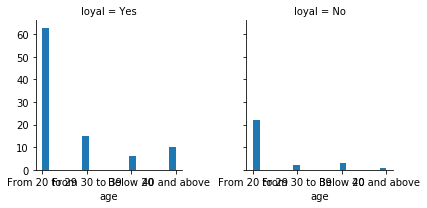

In [12]:
# 나이별 충성고객
g = sns.FacetGrid(df, col='loyal')
g.map(plt.hist, 'age', bins=20)

C:\Users\kmck3\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


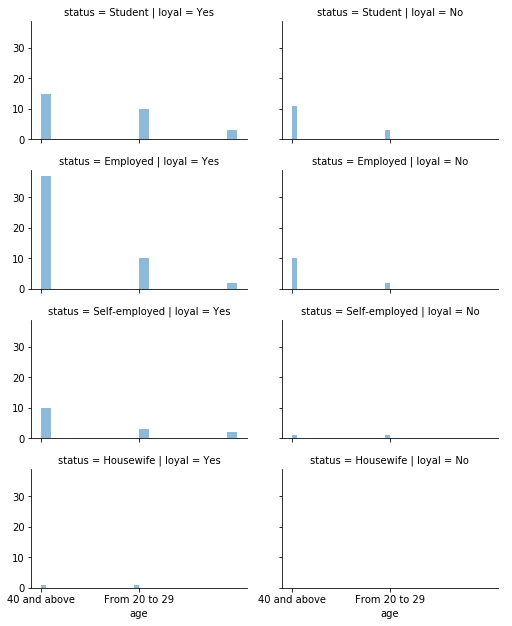

In [13]:
# 나이별 신분별 충성고객
grid = sns.FacetGrid(df, col='loyal', row='status', size=2.2, aspect=1.6) # 열에 충성도, 행에 객실 등급 
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

## 데이터 전처리: 속성에 따라 누락된 값을 채워 넣거나 속성 자체 제거

In [14]:
df["method"].fillna("Take away", inplace=True)
df["promoMethod"].fillna("Social Media", inplace=True)

## 데이터 전처리: 속성 조정

In [15]:
# Rate 총합 계산
df['Rate'] =df['productRate']+df['priceRate']+df['promoRate']+df['ambianceRate']+df['wifiRate']+df['serviceRate']+df['chooseRate']

In [16]:
# itemPurchase 속성조정
df['itemPurchase'].unique()

array(['Coffee', 'Cold drinks;Pastries', 'Coffee;Sandwiches',
       'Cold drinks', 'Coffee;Cold drinks',
       'Cold drinks;Pastries;Sandwiches',
       'Coffee;Juices;Pastries;Sandwiches', 'Coffee;Pastries;Sandwiches',
       'Coffee;Pastries', 'Cold drinks;Juices;Pastries',
       'Coffee;Cold drinks;Pastries;Sandwiches', 'Never', 'Never buy any',
       'Jaws chip ', 'cake ', 'Pastries', 'Cold drinks;Never', 'never',
       'Nothing ', 'Coffee;Cold drinks;Juices;Pastries;Sandwiches'],
      dtype=object)

In [17]:
#itemPurchase 데이터 전처리
df[['itemPurchase_1','itemPurchase_2','itemPurchase_3','itemPurchase_4','itemPurchase_5']] = df['itemPurchase'].str.split(';', n=4, expand=True)

In [18]:
#Coffee 분류
df['item_Coffee'] =0
df['item_Coffee'] = np.where(df['itemPurchase_1']=="Coffee", 1,df['item_Coffee'])
df['item_Coffee'] = np.where(df['itemPurchase_2']=="Coffee", 1,df['item_Coffee'])
df['item_Coffee'] = np.where(df['itemPurchase_3']=="Coffee", 1,df['item_Coffee'])
df['item_Coffee'] = np.where(df['itemPurchase_4']=="Coffee", 1,df['item_Coffee'])
df['item_Coffee'] = np.where(df['itemPurchase_5']=="Coffee", 1,df['item_Coffee'])

#Cold drinks 분류
df['item_Cold drinks'] =0
df['item_Cold drinks'] = np.where(df['itemPurchase_1']=='Cold drinks', 1,df['item_Cold drinks'])
df['item_Cold drinks'] = np.where(df['itemPurchase_2']=='Cold drinks', 1,df['item_Cold drinks'])
df['item_Cold drinks'] = np.where(df['itemPurchase_3']=="Cold drinks", 1,df['item_Cold drinks'])
df['item_Cold drinks'] = np.where(df['itemPurchase_4']=="Cold drinks", 1,df['item_Cold drinks'])
df['item_Cold drinks'] = np.where(df['itemPurchase_5']=="Cold drinks", 1,df['item_Cold drinks'])

#Juices 분류
df['item_Juices'] =0
df['item_Juices'] = np.where(df['itemPurchase_1']=='Juices', 1,df['item_Juices'])
df['item_Juices'] = np.where(df['itemPurchase_2']=='Juices', 1,df['item_Juices'])
df['item_Juices'] = np.where(df['itemPurchase_3']=='Juices', 1,df['item_Juices'])
df['item_Juices'] = np.where(df['itemPurchase_4']=='Juices', 1,df['item_Juices'])
df['item_Juices'] = np.where(df['itemPurchase_5']=='Juices', 1,df['item_Juices'])

#Pastries 분류
df['item_Pastries'] =0
df['item_Pastries'] = np.where(df['itemPurchase_1']=='Pastries', 1,df['item_Pastries'])
df['item_Pastries'] = np.where(df['itemPurchase_2']=='Pastries', 1,df['item_Pastries'])
df['item_Pastries'] = np.where(df['itemPurchase_3']=='Pastries', 1,df['item_Pastries'])
df['item_Pastries'] = np.where(df['itemPurchase_4']=='Pastries', 1,df['item_Pastries'])
df['item_Pastries'] = np.where(df['itemPurchase_5']=='Pastries', 1,df['item_Pastries'])

#Sandwiches 분류
df['item_Sandwiches'] =0
df['item_Sandwiches'] = np.where(df['itemPurchase_1']=='Sandwiches', 1,df['item_Sandwiches'])
df['item_Sandwiches'] = np.where(df['itemPurchase_2']=='Sandwiches', 1,df['item_Sandwiches'])
df['item_Sandwiches'] = np.where(df['itemPurchase_3']=='Sandwiches', 1,df['item_Sandwiches'])
df['item_Sandwiches'] = np.where(df['itemPurchase_4']=='Sandwiches', 1,df['item_Sandwiches'])
df['item_Sandwiches'] = np.where(df['itemPurchase_5']=='Sandwiches', 1,df['item_Sandwiches'])

#Others 분류
df['item_Others'] =0
df['item_Others'] = np.where(df['itemPurchase_1']=='Jaws chip ',1,df['item_Others'])
df['item_Others'] = np.where(df['itemPurchase_2']=='Jaws chip ',1,df['item_Others'])
df['item_Others'] = np.where(df['itemPurchase_3']=='Jaws chip ',1,df['item_Others'])
df['item_Others'] = np.where(df['itemPurchase_4']=='Jaws chip ',1,df['item_Others'])
df['item_Others'] = np.where(df['itemPurchase_5']=='Jaws chip ',1,df['item_Others'])
df['item_Others'] = np.where(df['itemPurchase_1']=='cake ',1,df['item_Others'])
df['item_Others'] = np.where(df['itemPurchase_2']=='cake ',1,df['item_Others'])
df['item_Others'] = np.where(df['itemPurchase_3']=='cake ',1,df['item_Others'])
df['item_Others'] = np.where(df['itemPurchase_4']=='cake ',1,df['item_Others'])
df['item_Others'] = np.where(df['itemPurchase_5']=='cake ',1,df['item_Others'])

In [19]:
#promoMethod 속성조정
df["promoMethod"].unique()

array(['Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)',
       'Social Media;In Store displays', 'In Store displays;Billboards',
       'Through friends and word of mouth',
       'Starbucks Website/Apps;Social Media', 'Social Media',
       'Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth',
       'Starbucks Website/Apps;Social Media;Through friends and word of mouth',
       'Social Media;Through friends and word of mouth',
       'Social Media;Through friends and word of mouth;In Store displays',
       'Starbucks Website/Apps', 'Emails', 'Social Media;Emails',
       'Through friends and word of mouth;In Store displays',
       'Social Media;In Store displays;Billboards', 'Application offer',
       'Starbucks Website/Apps;Social Media;Through friends and word of mouth;In Store displays',
       'In Store displays',
       'Social Media;Through friends and word of mouth;Billboards',
       'Starbucks Website/Apps;Social Me

In [20]:
#promoMethod 데이터 전처리
df[['promoMethod_1','promoMethod_2','promoMethod_3','promoMethod_4','promoMethod_5','promoMethod_6','promoMethod_7']] = df['promoMethod'].str.split(';', n=6, expand=True)

In [21]:
#Social Media 분류
df['promoMethodSoc'] =0
df['promoMethodSoc'] = np.where(df['promoMethod_1']=="Social Media", 1,df['promoMethodSoc'])
df['promoMethodSoc'] = np.where(df['promoMethod_2']=="Social Media", 1,df['promoMethodSoc'])
df['promoMethodSoc'] = np.where(df['promoMethod_3']=="Social Media", 1,df['promoMethodSoc'])
df['promoMethodSoc'] = np.where(df['promoMethod_4']=="Social Media", 1,df['promoMethodSoc'])
df['promoMethodSoc'] = np.where(df['promoMethod_5']=="Social Media", 1,df['promoMethodSoc'])
df['promoMethodSoc'] = np.where(df['promoMethod_6']=="Social Media", 1,df['promoMethodSoc'])
df['promoMethodSoc'] = np.where(df['promoMethod_7']=="Social Media", 1,df['promoMethodSoc'])

#promoMethodFriend 분류
df['promoMethodApp'] =0
df['promoMethodApp'] = np.where(df['promoMethod_1']=="Starbucks Website/Apps", 1,df['promoMethodApp'])
df['promoMethodApp'] = np.where(df['promoMethod_2']=="Starbucks Website/Apps", 1,df['promoMethodApp'])
df['promoMethodApp'] = np.where(df['promoMethod_3']=="Starbucks Website/Apps", 1,df['promoMethodApp'])
df['promoMethodApp'] = np.where(df['promoMethod_4']=="Starbucks Website/Apps", 1,df['promoMethodApp'])
df['promoMethodApp'] = np.where(df['promoMethod_5']=="Starbucks Website/Apps", 1,df['promoMethodApp'])
df['promoMethodApp'] = np.where(df['promoMethod_6']=="Starbucks Website/Apps", 1,df['promoMethodApp'])
df['promoMethodApp'] = np.where(df['promoMethod_7']=="Starbucks Website/Apps", 1,df['promoMethodApp'])

#promoMethodFriend 분류
df['promoMethodFriend'] =0
df['promoMethodFriend'] = np.where(df['promoMethod_1']=="Through friends and word of mouth", 1,df['promoMethodFriend'])
df['promoMethodFriend'] = np.where(df['promoMethod_2']=="Through friends and word of mouth", 1,df['promoMethodFriend'])
df['promoMethodFriend'] = np.where(df['promoMethod_3']=="Through friends and word of mouth", 1,df['promoMethodFriend'])
df['promoMethodFriend'] = np.where(df['promoMethod_4']=="Through friends and word of mouth", 1,df['promoMethodFriend'])
df['promoMethodFriend'] = np.where(df['promoMethod_5']=="Through friends and word of mouth", 1,df['promoMethodFriend'])
df['promoMethodFriend'] = np.where(df['promoMethod_6']=="Through friends and word of mouth", 1,df['promoMethodFriend'])
df['promoMethodFriend'] = np.where(df['promoMethod_7']=="Through friends and word of mouth", 1,df['promoMethodFriend'])

#promoMethodDisplay 분류
df['promoMethodEmail'] =0
df['promoMethodEmail'] = np.where(df['promoMethod_1']=="Emails", 1,df['promoMethodEmail'])
df['promoMethodEmail'] = np.where(df['promoMethod_2']=="Emails", 1,df['promoMethodEmail'])
df['promoMethodEmail'] = np.where(df['promoMethod_3']=="Emails", 1,df['promoMethodEmail'])
df['promoMethodEmail'] = np.where(df['promoMethod_4']=="Emails", 1,df['promoMethodEmail'])
df['promoMethodEmail'] = np.where(df['promoMethod_5']=="Emails", 1,df['promoMethodEmail'])
df['promoMethodEmail'] = np.where(df['promoMethod_6']=="Emails", 1,df['promoMethodEmail'])
df['promoMethodEmail'] = np.where(df['promoMethod_7']=="Emails", 1,df['promoMethodEmail'])

#promoMethodBillboard 분류
df['promoMethodBillboard'] =0
df['promoMethodBillboard'] = np.where(df['promoMethod_1']=='Billboards', 1,df['promoMethodBillboard'])
df['promoMethodBillboard'] = np.where(df['promoMethod_2']=='Billboards', 1,df['promoMethodBillboard'])
df['promoMethodBillboard'] = np.where(df['promoMethod_3']=='Billboards', 1,df['promoMethodBillboard'])
df['promoMethodBillboard'] = np.where(df['promoMethod_4']=='Billboards', 1,df['promoMethodBillboard'])
df['promoMethodBillboard'] = np.where(df['promoMethod_5']=='Billboards', 1,df['promoMethodBillboard'])
df['promoMethodBillboard'] = np.where(df['promoMethod_6']=='Billboards', 1,df['promoMethodBillboard'])
df['promoMethodBillboard'] = np.where(df['promoMethod_7']=='Billboards', 1,df['promoMethodBillboard'])

#promoMethodDeal 분류
df['promoMethodDeal'] =0
df['promoMethodDeal'] = np.where(df['promoMethod_1']=='Deal sites (fave, iprice, etc...)', 1,df['promoMethodDeal'])
df['promoMethodDeal'] = np.where(df['promoMethod_2']=='Deal sites (fave, iprice, etc...)', 1,df['promoMethodDeal'])
df['promoMethodDeal'] = np.where(df['promoMethod_3']=='Deal sites (fave, iprice, etc...)', 1,df['promoMethodDeal'])
df['promoMethodDeal'] = np.where(df['promoMethod_4']=='Deal sites (fave, iprice, etc...)', 1,df['promoMethodDeal'])
df['promoMethodDeal'] = np.where(df['promoMethod_5']=='Deal sites (fave, iprice, etc...)', 1,df['promoMethodDeal'])
df['promoMethodDeal'] = np.where(df['promoMethod_6']=='Deal sites (fave, iprice, etc...)', 1,df['promoMethodDeal'])
df['promoMethodDeal'] = np.where(df['promoMethod_7']=='Deal sites (fave, iprice, etc...)', 1,df['promoMethodDeal'])

#promoMethodOthers 분류
df['promoMethodOthers'] =0
df['promoMethodOthers'] = np.where(df['promoMethod_1']=='Application offer',1,df['promoMethodOthers'])
df['promoMethodOthers'] = np.where(df['promoMethod_2']=='Application offer',1,df['promoMethodOthers'])
df['promoMethodOthers'] = np.where(df['promoMethod_3']=='Application offer',1,df['promoMethodOthers'])
df['promoMethodOthers'] = np.where(df['promoMethod_4']=='Application offer',1,df['promoMethodOthers'])
df['promoMethodOthers'] = np.where(df['promoMethod_5']=='Application offer',1,df['promoMethodOthers'])
df['promoMethodOthers'] = np.where(df['promoMethod_6']=='Application offer',1,df['promoMethodOthers'])
df['promoMethodOthers'] = np.where(df['promoMethod_7']=='Application offer',1,df['promoMethodOthers'])


### 데이터 전처리 : 속성 조정 - 쓸모없는 속성 제거

In [22]:
df.head()
df.drop('itemPurchase', axis=1, inplace=True)
df.drop('itemPurchase_1', axis=1, inplace=True)
df.drop('itemPurchase_2', axis=1, inplace=True)
df.drop('itemPurchase_3', axis=1, inplace=True)
df.drop('itemPurchase_4', axis=1, inplace=True)
df.drop('itemPurchase_5', axis=1, inplace=True)
df.drop('promoMethod', axis=1, inplace=True)
df.drop('promoMethod_1', axis=1, inplace=True)
df.drop('promoMethod_2', axis=1, inplace=True)
df.drop('promoMethod_3', axis=1, inplace=True)
df.drop('promoMethod_4', axis=1, inplace=True)
df.drop('promoMethod_5', axis=1, inplace=True)
df.drop('promoMethod_6', axis=1, inplace=True)
df.drop('promoMethod_7', axis=1, inplace=True)


In [23]:
# 새로운 카테고리 속성을 만들어 새롭게 저장
df2 = pd.get_dummies(df, columns=["gender"]) 
df3 = pd.get_dummies(df2, columns=["age"]) 
df4 = pd.get_dummies(df3, columns=["status"]) 
df5 = pd.get_dummies(df4, columns=["income"]) 
df6 = pd.get_dummies(df5, columns=["visitNo"]) 
df7 = pd.get_dummies(df6, columns=["method"]) 
df8 = pd.get_dummies(df7, columns=["timeSpend"]) 
df9 = pd.get_dummies(df8, columns=["location"])
df10 = pd.get_dummies(df9, columns=["membershipCard"]) 
df11 = pd.get_dummies(df10, columns=["spendPurchase"])
df12 = pd.get_dummies(df11, columns=["loyal"]) 

# 결과 확인
df12.head()

,Id,productRate,priceRate,promoRate,ambianceRate,wifiRate,serviceRate,chooseRate,Rate,item_Coffee,...,location_more than 3km,location_within 1km,membershipCard_No,membershipCard_Yes,spendPurchase_Around RM20 - RM40,spendPurchase_Less than RM20,spendPurchase_More than RM40,spendPurchase_Zero,loyal_No,loyal_Yes
0,1,4,3,5,5,4,4,3,28,1,...,0,1,0,1,0,1,0,0,0,1
1,2,4,3,4,4,4,5,2,26,0,...,0,0,0,1,0,1,0,0,0,1
2,3,4,3,4,4,4,4,3,26,1,...,1,0,0,1,0,1,0,0,0,1
3,4,2,1,4,3,3,3,3,19,1,...,1,0,1,0,0,1,0,0,1,0
4,5,3,3,4,2,2,3,3,20,1,...,0,0,1,0,1,0,0,0,0,1


### 데이터 전처리 : 속성 조정 - 쓸모없는 속성 제거

In [24]:
df12.drop('gender_Female', axis=1, inplace=True)
df12.drop('membershipCard_No', axis=1, inplace=True)
df12.drop('loyal_No', axis=1, inplace=True)
df12.head()

,Id,productRate,priceRate,promoRate,ambianceRate,wifiRate,serviceRate,chooseRate,Rate,item_Coffee,...,timeSpend_More than 3 hours,location_1km - 3km,location_more than 3km,location_within 1km,membershipCard_Yes,spendPurchase_Around RM20 - RM40,spendPurchase_Less than RM20,spendPurchase_More than RM40,spendPurchase_Zero,loyal_Yes
0,1,4,3,5,5,4,4,3,28,1,...,0,0,0,1,1,0,1,0,0,1
1,2,4,3,4,4,4,5,2,26,0,...,0,1,0,0,1,0,1,0,0,1
2,3,4,3,4,4,4,4,3,26,1,...,0,0,1,0,1,0,1,0,0,1
3,4,2,1,4,3,3,3,3,19,1,...,0,0,1,0,0,0,1,0,0,0
4,5,3,3,4,2,2,3,3,20,1,...,0,1,0,0,0,1,0,0,0,1


## 데이터 속성별 값에 따라 충성도 확인


In [25]:
# 데이터 속성별로 값에 따라 충성도 확률 (속성값에 따라 그루핑)

In [26]:
# 성별에 따른 충성도 확률
df12[['gender_Male', 'loyal_Yes']].groupby(['gender_Male'], as_index=False).mean().sort_values(by='loyal_Yes', ascending=False)

,gender_Male,loyal_Yes
1,1,0.771930
0,0,0.769231


In [27]:
# 멤버쉽카드에 따른 충성도 확률
df12[['membershipCard_Yes', 'loyal_Yes']].groupby(['membershipCard_Yes'], as_index=False).mean().sort_values(by='loyal_Yes', ascending=False)

,membershipCard_Yes,loyal_Yes
1,1,0.916667
0,0,0.629032


In [28]:
# 만족도점수에 따른 충성도 확률
df12[['Rate', 'loyal_Yes']].groupby(['Rate'], as_index=False).mean().sort_values(by='loyal_Yes', ascending=False)

,Rate,loyal_Yes
22,35,1.000000
21,34,1.000000
20,33,1.000000
4,17,1.000000
5,18,1.000000
19,32,1.000000
18,31,1.000000
17,30,1.000000
10,23,1.000000
14,27,1.000000


충성도에 성별은 큰 영향을 주지 않지만, 멤버쉽카드 여부와, 만족도 점수는 영향이 크다

In [29]:
#테스트 데이터 생성
df12_len = int(len(df12)/2)
df_test = df12.head(df12_len)
df_test

,Id,productRate,priceRate,promoRate,ambianceRate,wifiRate,serviceRate,chooseRate,Rate,item_Coffee,...,timeSpend_More than 3 hours,location_1km - 3km,location_more than 3km,location_within 1km,membershipCard_Yes,spendPurchase_Around RM20 - RM40,spendPurchase_Less than RM20,spendPurchase_More than RM40,spendPurchase_Zero,loyal_Yes
0,1,4,3,5,5,4,4,3,28,1,...,0,0,0,1,1,0,1,0,0,1
1,2,4,3,4,4,4,5,2,26,0,...,0,1,0,0,1,0,1,0,0,1
2,3,4,3,4,4,4,4,3,26,1,...,0,0,1,0,1,0,1,0,0,1
3,4,2,1,4,3,3,3,3,19,1,...,0,0,1,0,0,0,1,0,0,0
4,5,3,3,4,2,2,3,3,20,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,5,4,3,4,3,3,3,25,1,...,0,1,0,0,0,1,0,0,0,1
57,58,5,5,5,5,5,5,5,35,1,...,0,0,1,0,1,0,1,0,0,1
58,59,3,3,3,3,4,3,3,22,1,...,0,1,0,0,0,0,1,0,0,1
59,60,4,3,4,4,3,4,3,25,0,...,0,0,1,0,0,0,1,0,0,1


# Machine Learning 기법을 활용한 충성도 예측
## 활용 모델

Logistic Regression

k-Nearest Neighbors

Support Vector Machines

Naive Bayes classifier

Decision Tree

Artificial neural network

In [30]:
# 우선 학습 집합과 테스트 집합을 준비한다.
X_train = df12.drop("loyal_Yes", axis=1)
Y_train = df12["loyal_Yes"]
X_test  = df_test.drop("Id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((122, 62), (122,), (61, 62))

## Support Vector Machines

In [31]:
# SVM 모델 학습
svc = SVC()
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
# SVM 모델 학습
svc = SVC()
svc.fit(X_train, Y_train)
# 테스트 데이터에 대해 예측
Y_pred_svc = svc.predict(X_test)
# 테스트 데이터를 현재 레이블이 없으므로 학습 데이터에 대해 예측한 정확도 측정
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

77.05

## Logistic Regression

In [33]:
# Logistic Regression training
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\kmck3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Logistic Regression prediction
Y_pred_logreg = logreg.predict(X_test)
Y_pred_logreg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [35]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2) # training 데이터에 대해 예측 정확도 구함
acc_log

95.9

In [36]:
# 속성별 상관 계수
coeff_df  =  pd.DataFrame(df12.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
15,promoMethodApp,0.999558
2,promoRate,0.921379
10,item_Juices,0.919989
57,spendPurchase_Around RM20 - RM40,0.867651
19,promoMethodDeal,0.716296
...,...,...
30,"income_Less than RM25,000",-0.825609
33,"income_RM25,000 - RM50,000",-0.916788
61,loyal_Yes,-0.985806
53,location_1km - 3km,-1.021970


## k-Nearest Neighbor

In [37]:
knn  = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

88.52

## Naive Bayes classifiers

In [38]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_NB = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

50.82

## Decision tree

In [39]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_DT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

## Artificial Neural Network

In [40]:
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(10, 30), random_state=1)
ANN.fit(X_train, Y_train)
Y_pred_ANN = ANN.predict(X_test)
acc_ANN = round(ANN.score(X_train, Y_train) * 100, 2)
acc_ANN

C:\Users\kmck3\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100.0

활용 모델 중 Decision tree와 Artificial Neural Network의 정확도가 가장 높았으나, 100%에 대한 검증 필요,
두 모델의 예측값을 비교하여 검증

## 최종 결과 검증 및 저장

In [41]:
#Artificial Neural Network를 적용한 test데이터 예측
Y_pred = Y_pred_DT

submission_DT = pd.DataFrame({
        "Id": df_test["Id"],
        "loyal": Y_pred
    })


In [42]:
submission_DT

,Id,loyal
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
56,57,1
57,58,1
58,59,1
59,60,1


In [43]:
#Artificial Neural Network를 적용한 test데이터 예측
Y_pred = Y_pred_ANN

submission_Ann = pd.DataFrame({
        "Id": df_test["Id"],
        "loyal": Y_pred
    })

In [44]:
submission_Ann

,Id,loyal
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
56,57,0
57,58,1
58,59,1
59,60,1


In [45]:
#Decision tree의 정확도
sub1 = X_test["loyal_Yes"]-submission_DT["loyal"]
round(sum(sub1==0)/len(sub1)*100,2)

80.33

In [46]:
#Artificial Neural Network의 정확도
sub2 = X_test["loyal_Yes"]-submission_Ann["loyal"]
round(sum(sub2==0)/len(sub2)*100,2)

54.1

두 모델 비교시 Decision tree의 정확도가 더 높으나, Train데이터와의 정확도 차이가 크다.
Artificial Neural Network의 hidden_layer_sizes를 조정하여 재 학습

In [47]:
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(20, 50), random_state=1)
ANN.fit(X_train, Y_train)
Y_pred_ANN = ANN.predict(X_test)
acc_ANN = round(ANN.score(X_train, Y_train) * 100, 2)
acc_ANN

C:\Users\kmck3\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100.0

In [48]:
#Artificial Neural Network를 적용한 test데이터 예측
Y_pred = Y_pred_ANN

submission_Ann = pd.DataFrame({
        "Id": df_test["Id"],
        "loyal": Y_pred
    })

In [49]:
#Artificial Neural Network의 정확도
sub2 = X_test["loyal_Yes"]-submission_Ann["loyal"]
round(sum(sub2==0)/len(sub2)*100,2)

83.61

hidden_layer_sizes를 20개와 50개로 설정하였을때 Decision tree보다 높은 정확도를 나타낸다

In [50]:
#최종 예측결과 저장
submission_Ann.to_csv('./data/submission.csv', index=False)

## Confusion Matrix

In [51]:
# 위에서 학습한 svc 활용, training data에 대한 예측값 저장
Y_pred_svc_train = svc.predict(X_train)


In [52]:
# sklearn에서 제공하는 confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_train, Y_pred_svc_train)
CM

array([[ 0, 28],
       [ 0, 94]], dtype=int64)